In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [2]:
df_train=pd.read_csv(r"C:\Users\nikit\OneDrive\Desktop\PDF\DL\Googledata\Google_Stock_Price_Train.csv")
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [21]:
df_train.shape

(1258, 6)

In [4]:
training_set = df_train.iloc[:, 1: 2].values

In [5]:

sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training_set)

In [10]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])
    

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))
#newshape is in (batch size, number of timestamps, number of indicators). (batch size, number of timestamps) is the shape of X_train. Here we only have 1 indicator.

In [31]:
model1 = Sequential()

model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(rate = 0.2))

model1.add(LSTM(units = 50, return_sequences = False))
model1.add(Dropout(rate = 0.2))

model1.add(Dense(units = 1))

model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.summary()

#input_shape corresponds to the number of time stamps and the number of indicators.
#units is the number of LSTM neurons in the layer.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)               

In [32]:
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model1.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 23s 177ms/step - loss: 0.0374
Epoch 2/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0050
Epoch 13/100
38/38 

# for test data set

In [34]:
test=pd.read_csv(r"C:\Users\nikit\OneDrive\Desktop\PDF\DL\Googledata\Google_Stock_Price_Test.csv")
test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [35]:
test.shape

(20, 6)

In [36]:
test1 = test.iloc[:, 1:2].values

In [37]:
''''
First, we need to concatenate the train and test datasets for prediction, because we use the previous 60 
days’ stock prices to predict the next-day price. In another word, we need the 60 days’ price before the 
1st date in the test dataset.
''''

SyntaxError: EOL while scanning string literal (Temp/ipykernel_13400/1680591217.py, line 5)

In [38]:
dataset_total = pd.concat((df_train['Open'],test['Open']), axis = 0)

In [39]:
len(dataset_total),len(test)

(1278, 20)

In [ ]:
''''
Then, create the input for prediction, index starting from the date 60 days before the first date in the test dataset.
''''

In [40]:
inputs = dataset_total[len(dataset_total)-len(test)- 60: ].values

In [41]:
#reshape the inputs to have only 1 column.
inputs = inputs.reshape(-1, 1)

In [42]:
#using the scale set by the training set, scale the test inputs.
inputs = sc.transform(inputs)

In [43]:
# Creating a data structure with 60 timesteps
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [44]:
X_test = np.array(X_test)
# Reshape to a new dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [45]:
# Identify the predicted values
predicted_stock_price = model1.predict(X_test)



1/1 [==============================] - 3s 3s/step


In [46]:
# Inverse the scaling to put them back to the normal values
stockpred = sc.inverse_transform(predicted_stock_price)

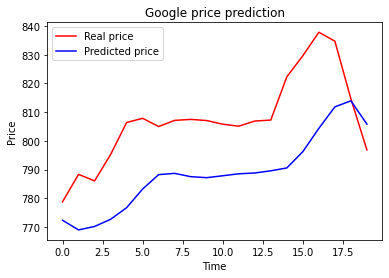

In [47]:
plt.plot(test1, color = 'red', label = 'Real price')
plt.plot(stockpred, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()